In [3]:
!pip install matplotlib pandas scikit-learn tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 29.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 9.5 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.8 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 33.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.1 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 21.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.6 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 46.5 MB/s e

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-05-24 13:23:48.113029: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 13:23:48.118339: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 13:23:48.130855: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748085828.151956    1115 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748085828.158114    1115 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748085828.174835    1115 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [5]:
# --- CONFIGURATION ---
MODEL_PATH = "CNN_RNN_model.keras"         # Path to trained model
X_VAL_PATH = "X_val.npy"             # Path to validation input
Y_VAL_PATH = "y_val.npy"             # Optional for future use

# --- LOAD MODEL ---
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# --- LOAD VALIDATION DATA ---
X_val = np.load(X_VAL_PATH)

# --- GET MODEL PREDICTIONS ---
y_pred = model.predict(X_val)  # Shape: (batch_size, time_steps, num_classes)

2025-05-24 13:23:55.877572: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-05-24 13:23:57.419871: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6291456000 exceeds 10% of free system memory.
2025-05-24 13:23:59.768136: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1572864000 exceeds 10% of free system memory.
2025-05-24 13:24:00.527506: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3145728000 exceeds 10% of free system memory.


1/3 ━━━━━━━━━━━━━━━━━━━━ 54s 27s/step

2025-05-24 13:24:23.998971: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6291456000 exceeds 10% of free system memory.
2025-05-24 13:24:26.175029: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1572864000 exceeds 10% of free system memory.


3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 20s/step


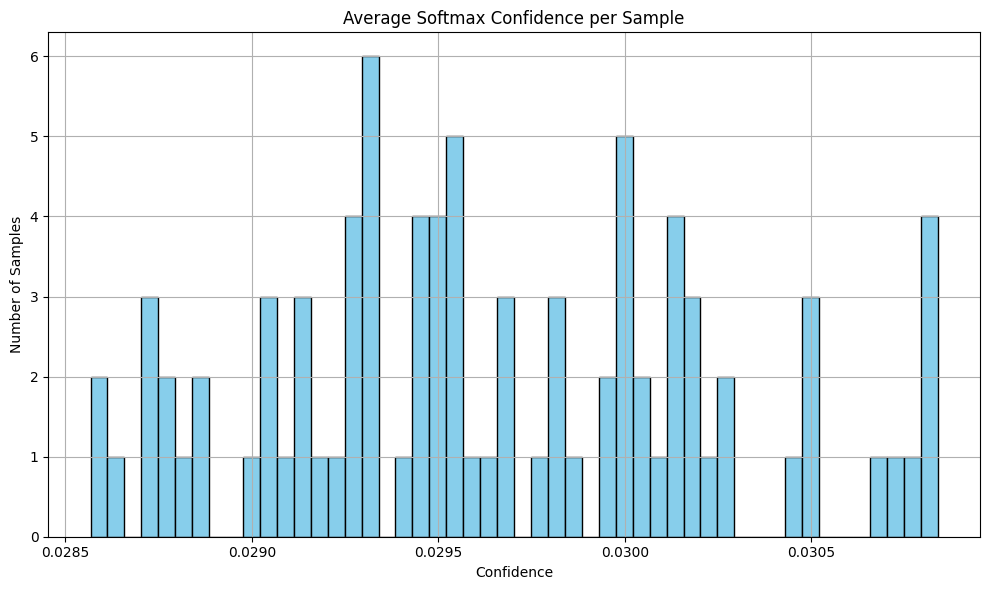

Average softmax confidence across validation set: 0.02964857


In [9]:
# --- COMPUTE SOFTMAX CONFIDENCE ---
softmax_probs = tf.nn.softmax(y_pred, axis=-1).numpy()
max_conf_per_step = np.max(softmax_probs, axis=-1)          # (batch_size, time_steps)
avg_conf_per_sample = np.mean(max_conf_per_step, axis=-1)   # (batch_size,)
mean_confidence = np.mean(avg_conf_per_sample)

# --- PLOT CONFIDENCE DISTRIBUTION ---
plt.figure(figsize=(10, 6))
plt.hist(avg_conf_per_sample, bins=50, color='skyblue', edgecolor='black')
plt.title("Average Softmax Confidence per Sample")
plt.xlabel("Confidence")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PRINT RESULT ---
print("Average softmax confidence across validation set:", mean_confidence)